In [18]:
%load_ext autoreload
%autoreload 2
from __future__ import print_function
from enlib import enmap
import numpy as np
from orphics import maps,io,stats,catalogs
from astropy.io import fits


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
# Data root dir
droot = "/home/msyriac/data/"

# Redmapper clusters; lots more but not as heavy
#catfile = droot+"sdss/redmapper_dr8_public_v6.3_catalog.fits"
#hdu = fits.open(catfile)
#ras = hdu[1].data['RA']
#decs = hdu[1].data['DEC']

# The ACT candidate cluster sample
catfile = droot+"act/act_candidate_clusters.fits"
hdu = fits.open(catfile)
ras = hdu[1].data['RAdeg']
decs = hdu[1].data['DECdeg']

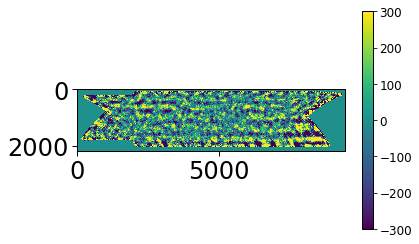

In [47]:
# Deep56 S15 PA1
mfile = droot+"act/s15_mr2_deep56_pa1_f150_night_set0123_wpoly_500_srcfree_I.fits"
cmb = enmap.read_fits(mfile)#,box=np.pi/180.*np.array([[-7.5,-10.],[5.5,40.]]))
io.plot_img(cmb,lim=[-300,300])

In [48]:
# How many clusters in total
print(len(ras))

# Let's choose a region so as not to loop over everything
# deep6
#dec_min = -8.
#ra_min = 30
#dec_max = -0.5
#ra_max = 40

# deep56
dec_min = -7.5
ra_min = -10.
dec_max = 5.5
ra_max = 40.

# I'm actually not sure if the combination of the logic in this function and the RA conventions makes this function behave as expected when the map crosses RA=0, but it surely returns some subsample of the clusters in this region!
iras,idecs,_ = catalogs.select_region(ras,decs,[],ra_min,ra_max,dec_min,dec_max)
print(len(iras))

8455
596


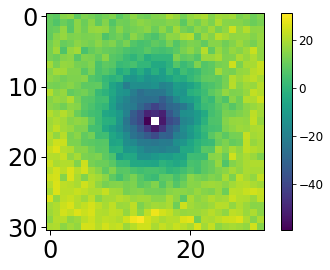

In [51]:
# The width of the stamp in arcminutes
arc = 15.5
stack = 0.
for i,(ra,dec) in enumerate(zip(iras,idecs)):
    # Need to pass coordinates in radians. pad just affects stamp rejection (returns None)
    cutout = maps.cutout(cmb,arc,ra=ra*np.pi/180.,dec=dec*np.pi/180.,pad=1,corner=False,preserve_wcs=False)
    if cutout is not None: stack += cutout
    
# Let's put nans in the exact center
maps.mask_center(stack)
# And look at the stack
io.plot_img(stack/i)    